In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [60]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [84]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

## Load Datasets

In [7]:
pretrained = True
freeze = False
num_classes = 200
num_attributes = 13
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False

In [8]:
BASE_DIR = ""
data_dir_small = "../cem/cem/CUB_small/preprocessed/"
data_dir_blur = "../cem/cem/CUB_blur/preprocessed/"
data_dir_tag = "../cem/cem/CUB_tag/preprocessed/"

In [9]:
train_data_path = os.path.join(BASE_DIR, data_dir_small, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [10]:
train_loader_small = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_small = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [11]:
train_data_path = os.path.join(BASE_DIR, data_dir_blur, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [12]:
train_loader_blur = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_blur = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [13]:
train_data_path = os.path.join(BASE_DIR, data_dir_tag, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [14]:
train_loader_tag = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path,is_training=False)
val_loader_tag = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

## Load Models

In [15]:
joint_location_blur = "ConceptBottleneck/results/CUB_blur/joint/best_model_42.pth"
joint_model_blur = torch.load(joint_location_blur,map_location=torch.device('cpu'))
r = joint_model_blur.eval()

In [16]:
joint_location_blur_concept = "ConceptBottleneck/other_results/CUB_blur/joint_concept_loss/best_model_42.pth"
joint_model_blur_concept = torch.load(joint_location_blur_concept,map_location=torch.device('cpu'))
r = joint_model_blur_concept.eval()

In [17]:
joint_location_blur_mse = "ConceptBottleneck/other_results/CUB_blur/joint_mse/best_model_42.pth"
joint_model_blur_mse = torch.load(joint_location_blur_mse,map_location=torch.device('cpu'))
r = joint_model_blur_mse.eval()

In [18]:
joint_location_blur_binary = "ConceptBottleneck/other_results/CUB_blur/joint_binary/best_model_42.pth"
joint_model_blur_binary = torch.load(joint_location_blur_binary,map_location=torch.device('cpu'))
r = joint_model_blur_binary.eval()

In [19]:
joint_location_blur_alternate = "ConceptBottleneck/other_results/CUB_blur/joint_alternate_loss/best_model_42.pth"
joint_model_blur_alternate = torch.load(joint_location_blur_alternate,map_location=torch.device('cpu'))
r = joint_model_blur_alternate.eval()

In [153]:
joint_location_blur_weight = "ConceptBottleneck/other_results/CUB_blur/joint_lambda/best_model_42.pth"
joint_model_blur_weight = torch.load(joint_location_blur_weight,map_location=torch.device('cpu'))
r = joint_model_blur_weight.eval()

In [154]:
config_location = "ConceptBottleneck/other_results/CUB_small/cem/ConceptEmbeddingModelNew_resnet34_fold_1_experiment_config.joblib"
cem_model_small = load_cem_model(config_location,"ConceptBottleneck/other_results/CUB_small/cem")
r = cem_model_small.eval()

In [155]:
config_location = "ConceptBottleneck/other_results/CUB_blur/cem/ConceptEmbeddingModelNew_resnet34_fold_1_experiment_config.joblib"
cem_model = load_cem_model(config_location,"ConceptBottleneck/other_results/CUB_blur/cem")
r = cem_model.eval()

## Evaluate Model

In [21]:
get_accuracy(joint_model_blur,run_joint_model,val_loader_blur)

tensor(0.9130)

In [22]:
get_accuracy(joint_model_blur_concept,run_joint_model,val_loader_blur)

tensor(0.9275)

In [23]:
get_accuracy(joint_model_blur_mse,run_joint_model,val_loader_blur)

tensor(0.8986)

In [24]:
get_accuracy(joint_model_blur_binary,run_joint_model,val_loader_blur)

tensor(0.5072)

In [25]:
get_accuracy(joint_model_blur_alternate,run_joint_model,val_loader_blur)

tensor(0.8406)

In [26]:
get_accuracy(joint_model_blur_weight,run_joint_model,val_loader_blur)

tensor(0.9275)

In [156]:
get_accuracy(cem_model_small,run_cem_model,val_loader_blur)

tensor(0.7826)

In [157]:
get_accuracy(cem_model,run_cem_model,val_loader_blur)

tensor(0.6667)

## Analyze Spurious Correlations

In [27]:
for idx,i in enumerate(train_loader_small):
    x_small,y_small,c_small = i
    break

In [28]:
func = add_blur_array

In [29]:
pil_images = [transforms.ToPILImage()(x_small[j]) for j in range(x_small.shape[0])]
transformed_images = [transforms.ToTensor()(func(image)) for image in pil_images]
transformed_images = [normalize_tensor(image)
                      for image in transformed_images]
transformed_images_tensor = torch.stack(transformed_images)

In [30]:
torch.set_printoptions(sci_mode=False)

In [31]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur_concept,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur_mse,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur_binary,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur_alternate,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur_weight,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [158]:
y_pred_blur, c_pred_blur = run_cem_model(cem_model_small,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([1, 2, 4, 1, 4, 1, 3, 1, 1, 3, 7, 3, 1, 1, 3, 4, 1, 2, 1, 2, 3, 3, 3, 2,
        1, 3, 2, 1, 3, 2, 8, 4, 2, 1, 3, 3, 3, 1, 1, 1, 4, 3, 1, 4, 4, 2, 4, 6,
        4, 3, 8, 2, 6, 3, 5, 1, 4, 2, 5, 3, 1, 4, 4, 2])

In [159]:
y_pred_blur, c_pred_blur = run_cem_model(cem_model,transformed_images_tensor)
logits_to_index(y_pred_blur)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Activation Based Analysis

In [37]:
weights_blur, c_pred_blur = get_attribute_class_weights(joint_model_blur,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[1.042615532875061, 0.9918433427810669, 0.877951443195343, 0.5534395575523376, 0.519017219543457, 0.07768113911151886] ['has_head_p (#37)', 'has_upperp (#10)', 'has_upperp (#12)', 'has_wing_c (#9)', 'has_breast (#23)', 'Extra Node (#112)']


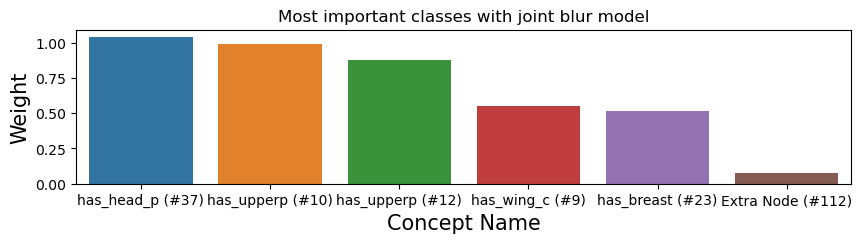

In [38]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur,CUB_ATTRIBUTES,add_extra_node=True)

In [39]:
weights_blur_concept, c_pred_blur_concept = get_attribute_class_weights(joint_model_blur_concept,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[0.9553802013397217, 0.8844835758209229, 0.675076425075531, 0.5740758180618286, 0.41927653551101685, 0.11751819401979446] ['has_head_p (#37)', 'has_upperp (#10)', 'has_upperp (#12)', 'has_wing_c (#9)', 'has_breast (#23)', 'Extra Node (#112)']


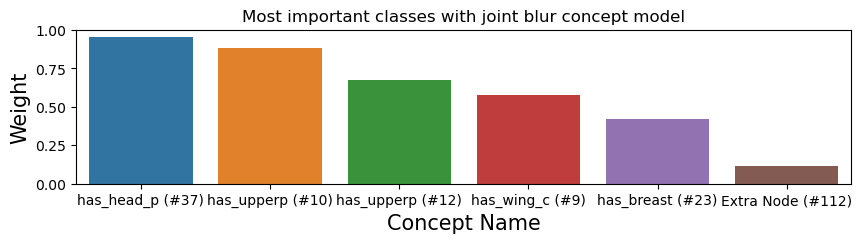

In [40]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur concept model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_concept,CUB_ATTRIBUTES,add_extra_node=True)

In [41]:
weights_blur_mse, c_pred_blur_mse = get_attribute_class_weights(joint_model_blur_mse,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[0.6990649700164795, 0.6439875364303589, 0.42978477478027344, 0.4163966178894043, 0.3658778965473175, 0.04201100766658783] ['has_upperp (#10)', 'has_head_p (#37)', 'has_upperp (#12)', 'has_wing_c (#9)', 'has_breast (#23)', 'Extra Node (#112)']


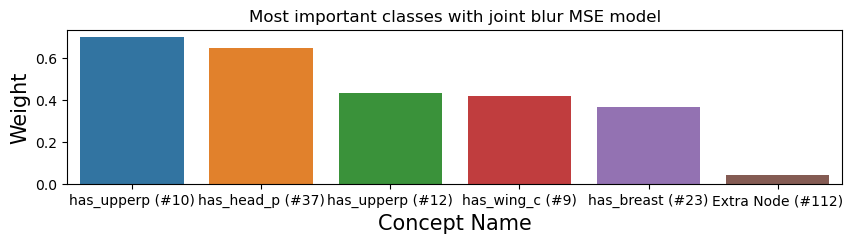

In [42]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur MSE model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_mse,CUB_ATTRIBUTES,add_extra_node=True)

In [43]:
weights_blur_binary, c_pred_blur_binary = get_attribute_class_weights(joint_model_blur_binary,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[0.9225202798843384, 0.5020453929901123, 0.4891825020313263, 0.4631234109401703, 0.3580114245414734, -0.017470257356762886] ['has_upperp (#10)', 'has_breast (#23)', 'has_head_p (#37)', 'has_upperp (#12)', 'has_eye_co (#50)', 'Extra Node (#112)']


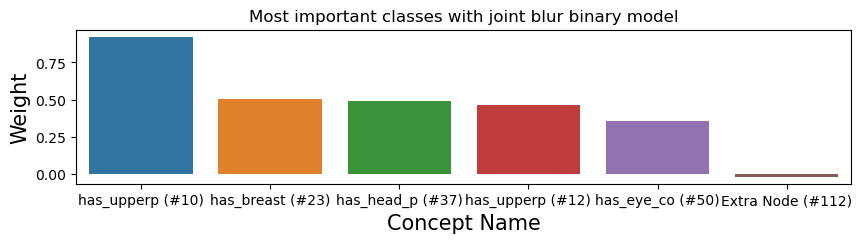

In [44]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur binary model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_binary,CUB_ATTRIBUTES,add_extra_node=True)

In [45]:
weights_blur_alternate, c_pred_blur_alternate = get_attribute_class_weights(joint_model_blur_alternate,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[1.0445284843444824, 0.9576183557510376, 0.7423017024993896, 0.6235948801040649, 0.5639525651931763, 0.09703251719474792] ['has_upperp (#10)', 'has_head_p (#37)', 'has_upperp (#12)', 'has_breast (#23)', 'has_wing_c (#9)', 'Extra Node (#112)']


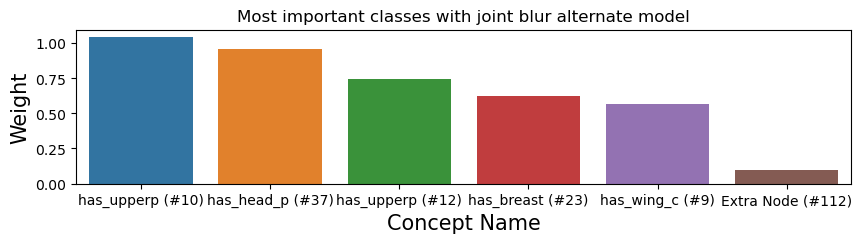

In [50]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur alternate model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_alternate,CUB_ATTRIBUTES,add_extra_node=True)

In [47]:
weights_blur_weight, c_pred_blur_weight = get_attribute_class_weights(joint_model_blur_weight,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

[1.0208146572113037, 0.9854989051818848, 0.9721450805664062, 0.6433293223381042, 0.602169394493103, 0.017585787922143936] ['has_head_p (#37)', 'has_upperp (#10)', 'has_wing_c (#9)', 'has_upperp (#12)', 'has_breast (#23)', 'Extra Node (#112)']


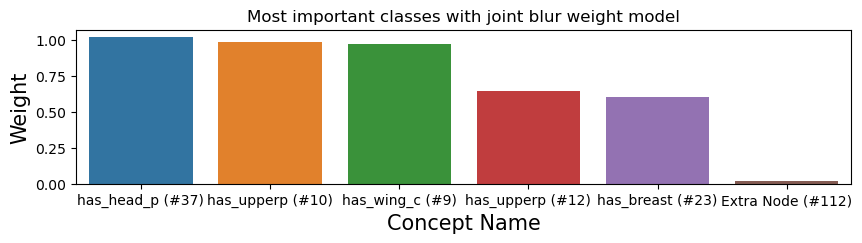

In [49]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur weight model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_weight,CUB_ATTRIBUTES,add_extra_node=True)

In [160]:
weights_blur_cem_small, c_pred_blur_cem_small = get_attribute_class_weights(cem_model_small,run_cem_model,cem_model_small.c2y_model[0].weight,transformed_images_tensor,cem=True)

[0.40594905614852905, 0.37619444727897644, 0.34252500534057617, 0.31080228090286255, 0.30384477972984314, 0.17728538811206818] ['has_belly_ (#70)', 'has_forehe (#55)', 'has_nape_c (#69)', 'has_back_c (#28)', 'has_wing_p (#108)', 'Extra Node (#112)']


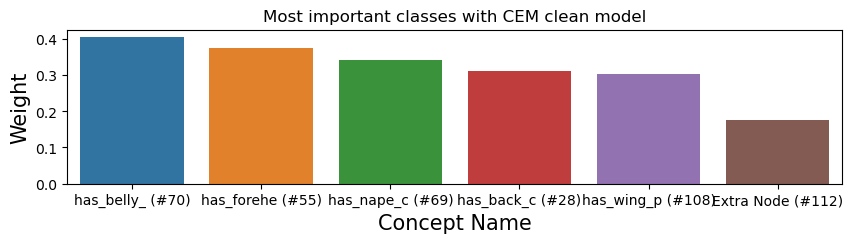

In [161]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with CEM clean model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_cem_small,CUB_ATTRIBUTES,add_extra_node=True)

In [140]:
weights_blur_cem, c_pred_blur_cem = get_attribute_class_weights(cem_model,run_cem_model,cem_model.c2y_model[0].weight,transformed_images_tensor,cem=True)

[0.6260432004928589, 0.621751606464386, 0.6121121048927307, 0.5354906320571899, 0.527885913848877, 0.39359158277511597] ['has_throat (#47)', 'has_primar (#93)', 'has_upperp (#11)', 'has_forehe (#58)', 'has_underp (#21)', 'Extra Node (#112)']


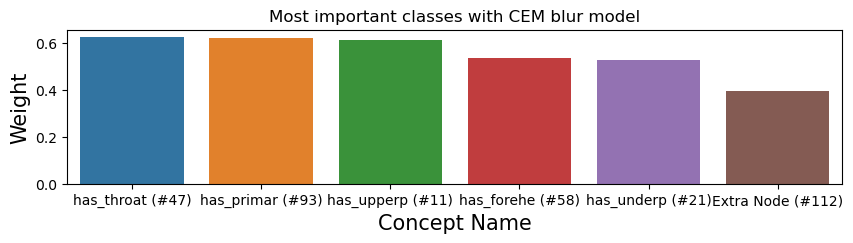

In [141]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with CEM blur model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_cem,CUB_ATTRIBUTES,add_extra_node=True)

In [167]:
float(torch.mean(weights_blur_cem[0,-1,:]))

0.39359158277511597

<AxesSubplot:title={'center':'Most important classes with CEM blur model'}, xlabel='Methodology', ylabel='Weight'>

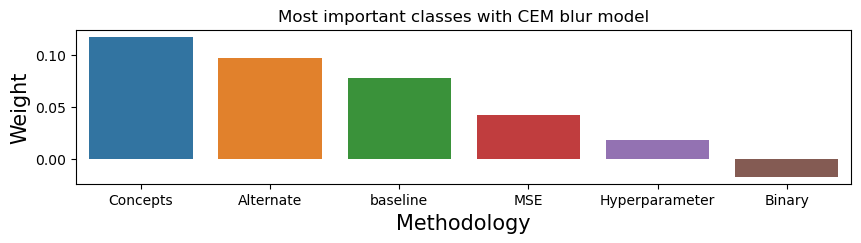

In [172]:
labels = np.array(["baseline","MSE","Concepts","Binary","Hyperparameter","Alternate"])
values = [float(torch.mean(w[0,-1,:])) for w in [weights_blur,weights_blur_mse,weights_blur_concept,weights_blur_binary,weights_blur_weight,weights_blur_alternate]]
values = np.array(values)
sorted_indices = np.argsort(-values)
plt.figure(figsize=(10,2))
plt.title("Most important classes with CEM blur model")
plt.xlabel("Methodology",fontsize=15)
plt.ylabel("Weight",fontsize=15)
sns.barplot(x=labels[sorted_indices], y=values[sorted_indices])